###     TIPP - AAI Assignement (Applied AI Solutions Development – Computer Vision)<br>Due Date: 6 March 2020
###     Submitted By: <u>KOAY</u> SENG TIAN<br>Email: sengtian@yahoo.com

In [0]:
# TIPP - AAI Assignment (Applied AI Solutions Development – Computer Vision)
# Date Due: 6 March 2020
# Submited By: KOAY SENG TIAN
# Email: sengtian@yahoo.com
#
# GitHub: https://github.com/koayst/rp_computer_vision_assignment
#
# (Google colab directory structure)
# TIPP_AAI_AAISD_CV 
#        |--- clean_dataset
#        |          |--- Amur_Asian_Paradise_Flycatcher (images of bird for training)
#        |          |         .
#        |          |         . (total 77 directories)
#        |          |         .
#        |          |--- Zitting_Cisticola
#        |
#        |--- test_bird (images if bird for testing)
#        |--- question_1_cv_colab.ipynb
#        |--- question_2_cv_colab.ipynb
#        |--- bird_cv_model.h5
#        |--- bird_cv_labels.pkl

In [2]:
# Most likely the following python script will be run in google's colab.
# This is because running under a GPU setup is faster when compared to 
# running it under a CPU setup
#
# May need to change the below according to your google drive account configuration
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# set up the initial values of the variables
# copy from Question_1_CV.ipynb

script_dir = 'gdrive/My Drive/TIPP_AAI_AAISD_CV'
test_dir = 'gdrive/My Drive/TIPP_AAI_AAISD_CV/test_bird'
model_name = 'bird_cv_model.h5'
label_name = 'bird_cv_labels.pkl'

In [4]:
# google colab specifics
%tensorflow_version 1.x

# to hide tensorflow warning messages
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

from keras.models import load_model
import os

model = load_model(os.path.join(script_dir, model_name))
#model.summary()
print('Load model')

Using TensorFlow backend.


Load model


In [5]:
import pickle

with open(os.path.join(script_dir, label_name), 'rb+') as encoder_file:
    lb = pickle.load(encoder_file)
    print('Load LabelEncoder.')

lb_name_mapping = dict(zip(lb.transform(lb.classes_), lb.classes_))

Load LabelEncoder.


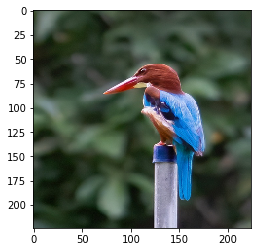

Original: 10.jpg
01: White-throated_Kingfisher..... |99.37%|
02: Common_Kingfisher............. |00.34%|
03: Stork-billed_Kingfisher....... |00.23%|



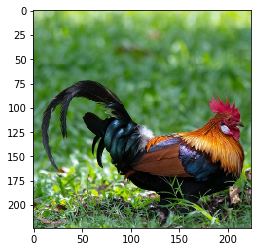

Original: 2.jpg
01: Red_Junglefowl................ |87.80%|
02: Zanzibar_Red_Bishop........... |04.58%|
03: Yellow_Bittern................ |01.56%|



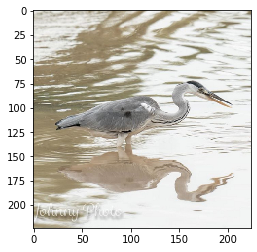

Original: 3.jpg
01: Lesser_Egret.................. |38.50%|
02: White-breasted_Waterhen....... |25.97%|
03: Whooper_Swan.................. |13.95%|



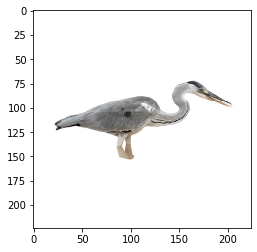

Original: 3_Grey_Heron_removebg.jpg
01: Grey_Heron.................... |99.36%|
02: Brahmini_Kite................. |00.43%|
03: Swiftlet...................... |00.08%|



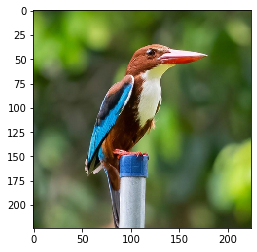

Original: 4.jpg
01: White-throated_Kingfisher..... |98.72%|
02: Oriental_Pied_Hornbill........ |00.92%|
03: Blue-winged_Pita.............. |00.25%|



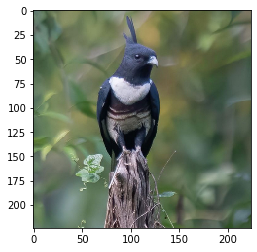

Original: 7.jpg
01: Black_Baza.................... |99.98%|
02: Blue-winged_Pita.............. |00.02%|
03: White-breasted_Waterhen....... |00.00%|



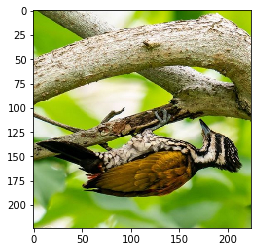

Original: 8.jpg
01: Black_Baza.................... |99.27%|
02: Pied_Triller.................. |00.31%|
03: Sunda_Scoops_Owl.............. |00.18%|



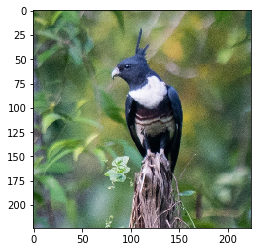

Original: 9.jpg
01: Black_Baza.................... |99.99%|
02: Oriental_Magpie_Robin......... |00.01%|
03: Oriental_Pied_Hornbill........ |00.00%|



In [6]:
#from keras.preprocessing import image

import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

from imutils import paths

img_size = 224

for imgFile in np.sort(list(paths.list_images(test_dir))):
    image = cv2.imread(imgFile)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (img_size, img_size))

    data = np.array(image)
    plt.imshow(data)
    plt.show()
    
    data = np.expand_dims(data, axis=0)

    preds = model.predict(data)
    top_three_prob = np.sort(preds[0])[-1:-4:-1]
    top_three_indices = np.argsort(preds[0])[-1:-4:-1]

    print('Original:', imgFile.split(os.path.sep)[-1])
    for i in range(len(top_three_prob)): 
        print('{:02d}: {:{}{}{}} |{:05.2f}%|'.format(
        	i+1, 
        	lb_name_mapping[top_three_indices[i]], '.', '<', 30, top_three_prob[i]*100))
    print()
